In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_95e578fb3e7241eb9df028dd7c510a22 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='iTO4a82dpnQ602fUwULcxw1g8mqcTo-D3aZr48Ij8f29',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_95e578fb3e7241eb9df028dd7c510a22.get_object(Bucket='salaryprediction-donotdelete-pr-kl1iggzqqte2zy',Key='Salary_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


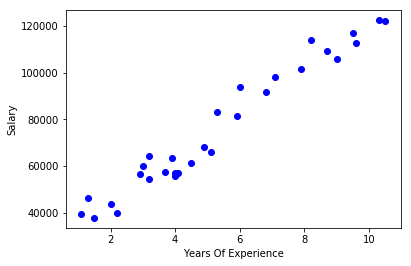

In [11]:
plt.scatter(df["YearsExperience"].values, df["Salary"].values,  color='blue')
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.show()

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(df[['YearsExperience']])
train_y = np.asanyarray(df[['Salary']])
regr.fit (train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9449.96232146]]
Intercept:  [25792.20019867]


Text(0, 0.5, 'Salary')

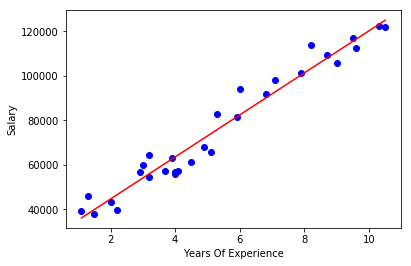

In [14]:
plt.scatter(df["YearsExperience"].values, df["Salary"].values,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")

In [15]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

wml_credentials={
  "apikey": "YbN29BVzmug90Kie0vtgOfJMEfG4n1hdrpcon1IJh1g3",
  "iam_apikey_description": "Auto-generated for key 56aae863-f80f-4c83-86c9-18946c94f126",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/5543f54112c14eadaf19fb87382276af::serviceid:ServiceId-3684aad9-de90-4451-81c4-f6ff93d2d249",
  "instance_id": "f09f24bc-ac23-473f-b389-43a87aab7afa",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

client = WatsonMachineLearningAPIClient(wml_credentials)


2020-06-25 10:26:52,511 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.
2020-06-25 10:27:46,782 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [20]:
metadata = {
    client.repository.ModelMetaNames.AUTHOR_NAME: 'Shreya',
    client.repository.ModelMetaNames.AUTHOR_EMAIL: 'shreya.tiwari59@nmims.edu.in',
    client.repository.ModelMetaNames.NAME: 'SalaryPrediction'
}

In [25]:
model_details = client.repository.store_model(regr, meta_props = metadata)

In [26]:
model_details

{'metadata': {'guid': '9b87fa57-bbba-4a2f-b7f8-798c448ae266',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f09f24bc-ac23-473f-b389-43a87aab7afa/published_models/9b87fa57-bbba-4a2f-b7f8-798c448ae266',
  'created_at': '2020-06-25T10:27:47.099Z',
  'modified_at': '2020-06-25T10:27:47.162Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f09f24bc-ac23-473f-b389-43a87aab7afa/published_models/9b87fa57-bbba-4a2f-b7f8-798c448ae266/learning_configuration',
  'author': {'name': 'Shreya'},
  'name': 'SalaryPrediction',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f09f24bc-ac23-473f-b389-43a87aab7afa/published_models/9b87fa57-bbba-4a2f-b7f8-798c448ae266/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f09f24bc-ac23-473f-b389-43a87aab7afa/published_models/9b87fa57-bbba-4a2f-b7f8-798c448ae266/feedback',
  'latest_version': {'url': '

In [27]:
published_model_uid = client.repository.get_model_uid(model_details)
published_model_uid

'9b87fa57-bbba-4a2f-b7f8-798c448ae266'

In [28]:
created_deployment = client.deployments.create(published_model_uid, name="MLR")



#######################################################################################

Synchronous deployment creation for uid: '9b87fa57-bbba-4a2f-b7f8-798c448ae266' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='5b65535c-adbd-44de-af80-b3e95b4ce59a'
------------------------------------------------------------------------------------------------




In [29]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f09f24bc-ac23-473f-b389-43a87aab7afa/deployments/5b65535c-adbd-44de-af80-b3e95b4ce59a/online'

In [30]:
client.deployments.list()

------------------------------------  ----  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME  TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
5b65535c-adbd-44de-af80-b3e95b4ce59a  MLR   online  DEPLOY_SUCCESS  2020-06-25T10:29:45.279Z  scikit-learn-0.20  model
------------------------------------  ----  ------  --------------  ------------------------  -----------------  -------------
